In [70]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['StHeiti']
plt.rcParams['axes.unicode_minus'] = False

In [9]:
data = pd.read_csv('../assets/LJdata.csv')
data.head()

,区域,地址,标题,户型,面积,价格,楼层,建造时间,朝向,更新时间,看房人数,备注,链接地址
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,30,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   区域      2760 non-null   object
 1   地址      2760 non-null   object
 2   标题      2760 non-null   object
 3   户型      2760 non-null   object
 4   面积      2760 non-null   int64 
 5   价格      2760 non-null   int64 
 6   楼层      2760 non-null   object
 7   建造时间    2758 non-null   object
 8   朝向      2760 non-null   object
 9   更新时间    2760 non-null   object
 10  看房人数    2760 non-null   int64 
 11  备注      2760 non-null   object
 12  链接地址    2760 non-null   object
dtypes: int64(3), object(10)
memory usage: 280.4+ KB


In [11]:
data.columns

Index(['区域', '地址', '标题', '户型', '面积', '价格', '楼层', '建造时间', '朝向', '更新时间', '看房人数',
       '备注', '链接地址'],
      dtype='object')

In [12]:
data.columns = ['district', 'address', 'title', 'house_type', 'area', 'price', 'floor', 'build_time', 'direction', 'update_time', 'view_num', 'extra_info', 'link']

In [13]:
data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,30,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html


In [16]:
### 租金最低和最高的房子
data.loc[data['price'].argmax()]
data.loc[data['price'].argmin()]

district                                                  良乡租房
address                                                 伟业嘉园西里
title                                     半地下室 家电齐全 集中供暖 简单装修 
house_type                                                1室1厅
area                                                        46
price                                                     1300
floor                                                 地下室(共5层)
build_time                                              2005年建
direction                                                    南
update_time                                         2017.07.19
view_num                                                    14
extra_info                                           随时看房 集中供暖
link           https://bj.lianjia.com/zufang/101101538484.html
Name: 2527, dtype: object

In [21]:
### 最近新上的10套房源
data.sort_values(by='update_time', ascending=False).head(10)

idx = data.sort_values(by='update_time', ascending=True).index[:10]
data.loc[idx]

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,ut
2439,良乡租房,良乡中路24号院,国泰百货旁边正规三居室 诚心出租 有钥匙随时看房,3室1厅,68,2400,高楼层(共6层),1990年建板楼,南,2017.07.14,0,距离房山线良乡南关站939米 随时看房,https://bj.lianjia.com/zufang/101101799730.html,2017-07-14
1683,甘露园租房,康家园,康家园 2室1厅 5000元,2室1厅,65,5000,中楼层(共6层),1997年建板楼,南,2017.07.14,25,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101575607.html,2017-07-14
1281,东直门租房,华普花园,东二环 东直门 华普花园 出租三居室 看房方便,3室1厅,171,20000,中楼层(共22层),2001年建塔楼,南,2017.07.14,3,距离2号线东四十条站323米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101812938.html,2017-07-14
1029,草桥租房,恋日花都,恋日花都 南三环 封闭管理小区 开间,1室0厅,54,4400,高楼层(共17层),2006年建塔楼,东北,2017.07.14,27,距离10号线草桥站460米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101678256.html,2017-07-14
872,朝青租房,天鹅湾北区,天鹅湾北区精致时尚loft 业主婚房诚意出租,1室1厅,46,9500,中楼层(共8层),2010年建板塔结合,西,2017.07.14,39,距离6号线青年路站736米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101606488.html,2017-07-14
2030,朝青租房,天鹅湾北区,天鹅湾北区 3室2厅 23000元,3室2厅,123,23000,高楼层(共18层),2007年建板塔结合,西,2017.07.14,12,距离6号线青年路站481米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101047834.html,2017-07-14
142,牡丹园租房,塔院小区,牡丹园西土城地铁北医三院塔院小区南北向两居室,2室1厅,56,7500,中楼层(共6层),1988年建板楼,南 北,2017.07.14,42,距离10号线西土城站841米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101667962.html,2017-07-14
140,五棵松租房,六建,六建大两居，看房随时，有钥匙。,2室1厅,61,5500,低楼层(共16层),1988年建塔楼,南 北,2017.07.14,54,距离1号线五棵松站110米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101663107.html,2017-07-14
31,天宁寺租房,白菜湾社区,精装修2居价钱可聊随时拎包入住,2室1厅,59,5100,中楼层(共6层),1992年建板楼,南 北,2017.07.14,34,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101749057.html,2017-07-14
2562,CBD租房,和乔丽致公寓,CBD白领公寓 和乔经典loft 一居室 拎包入住,1室1厅,61,12000,中楼层(共16层),2003年建塔楼,北,2017.07.14,9,距离1号线大望路站703米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101520184.html,2017-07-14


In [22]:
## 查看所有更新时间
data['ut'] = pd.to_datetime(data['update_time'], format='%Y.%m.%d')
ut = data['ut']
ut.unique()
ut.nunique()

14

In [32]:
## 查看看房人数信息
data['view_num']
data['view_num'].sum()
data['view_num'].mean()
data['view_num'].median()
data[data['view_num'] >=80]
## data.drop_duplicates() 去重
data[data['view_num'] >=100]

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,ut
989,右安门内租房,清芷园,清芷园 2室1厅 7800元,2室1厅,78,7800,低楼层(共18层),2000年建板塔结合,西北,2017.07.23,122,距离4号线陶然亭站798米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101100523048.html,2017-07-23
1002,右安门内租房,清芷园,清芷园 2室1厅 7800元,2室1厅,78,7800,低楼层(共18层),2000年建板塔结合,西北,2017.07.23,122,距离4号线陶然亭站798米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101100523048.html,2017-07-23
1670,双榆树租房,双榆树东里,双榆树东里 3室1厅 8300元,3室1厅,71,8300,中楼层(共16层),1990年建塔楼,西北,2017.07.23,102,距离4号线人民大学站818米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101100265730.html,2017-07-23


In [36]:
### 不同看房人数的房源数量
data.groupby('view_num', as_index=False)['district'].count()

,view_num,district
0,0,152
1,1,149
2,2,143
3,3,129
4,4,147
...,...,...
69,82,1
70,84,1
71,86,1
72,102,1


In [40]:
## 房租价格分布
data['price'].describe()
pd.qcut(data['price'], q=5)

0         (5500.0, 6700.0]
1         (6700.0, 9300.0]
2         (6700.0, 9300.0]
3         (4200.0, 5500.0]
4         (5500.0, 6700.0]
               ...        
2755    (9300.0, 210000.0]
2756    (9300.0, 210000.0]
2757      (6700.0, 9300.0]
2758    (9300.0, 210000.0]
2759      (5500.0, 6700.0]
Name: price, Length: 2760, dtype: category
Categories (5, interval[float64, right]): [(1299.999, 4200.0] < (4200.0, 5500.0] < (5500.0, 6700.0] < (6700.0, 9300.0] < (9300.0, 210000.0]]

<Figure size 640x480 with 0 Axes>

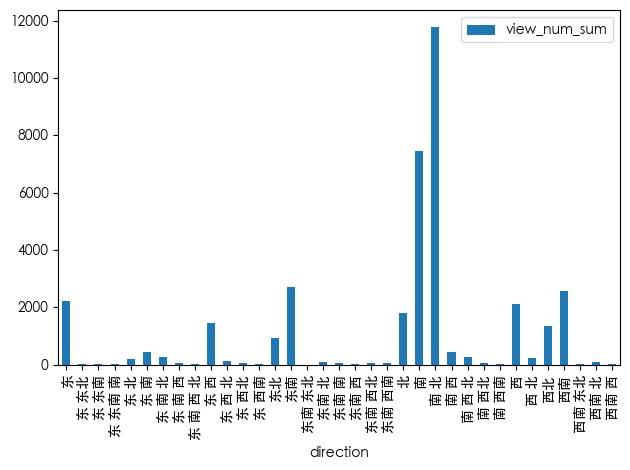

In [75]:
## 看房人数最多的朝向
tdf = data.groupby('direction', as_index=False)['view_num'].sum()
tdf.columns = ['direction', 'view_num_sum']
tdf.loc[tdf['view_num_sum'].argmax()]
tdf.set_index('direction', inplace=True)
plt.figure()
tdf.plot.bar()
plt.xlabel('direction')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

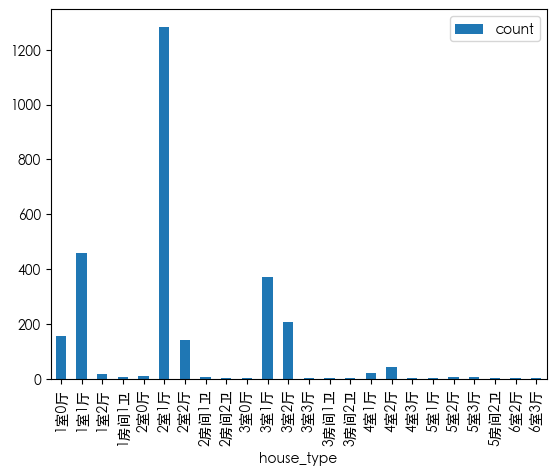

In [83]:
## 房型分布
tdf = data.groupby('house_type', as_index=False)['district'].count()
tdf.columns = ['house_type', 'count']
plt.figure()
tdf.plot.bar(x='house_type', y='count')
plt.show()

In [103]:
## 最受欢迎的房型
tdf = data.groupby('house_type', as_index=False)['view_num'].sum()
tdf.columns = ['house_type', 'view_num_sum']
tdf.loc[tdf['view_num_sum'].argmax()]

# data.groupby('house_type', as_index=False).agg({'view_num': 'sum'})


,house_type,view_num
0,1室0厅,2242
1,1室1厅,7037
2,1室2厅,290
3,1房间1卫,74
4,2室0厅,142
5,2室1厅,17589
6,2室2厅,1789
7,2房间1卫,119
8,2房间2卫,32
9,3室0厅,32


In [101]:
## 房子平均租房价格(元/平米)
tdf = data['price'] / data['area']
data['price_per_m2'] = tdf
data['price_per_m2'].mean()
tdf.mean()

np.float64(87.72268429900454)

In [108]:
## 热门小区 小区的房源最多
tdf = data.groupby(['address'], as_index=False)['view_num'].sum()
tdf.columns = ['address', 'view_num_sum']
tdf.loc[tdf['view_num_sum'].argmax()]
tdf.sort_values(by='view_num_sum', ascending=False).head(10)

,address,view_num_sum
951,清芷园,246
369,卡布其诺,245
938,润枫水尚,217
1149,芍药居北里,194
743,新康园,186
1288,远洋山水,184
342,华贸城,176
15,万国城MOMA,176
1460,龙华园,171
1182,荣丰2008,170


In [115]:
tdf = data[['address', 'area']].groupby(['address'], as_index=False).count()
tdf.columns = ['address', 'count']
tdf.nlargest(10, 'count')

,address,count
1288,远洋山水,19
938,润枫水尚,10
401,后现代城,9
481,大方居,9
516,天畅园,9
541,太阳公元,9
711,慧忠里,9
1149,芍药居北里,9
1313,金地仰山,9
159,乐城,8


In [116]:
data[data['address'] == '远洋山水']

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,ut,price_per_m2
53,鲁谷租房,远洋山水,改好的两室一厅 带一个地下车位 也可单租 看房随时,2室1厅,76,7000,低楼层(共26层),2007年建板塔结合,东南,2017.07.22,31,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101796387.html,2017-07-22,92.105263
191,鲁谷租房,远洋山水,远洋山水 北区 近地铁大三居 随时看房,3室1厅,137,11500,高楼层(共26层),2004年建板塔结合,南 北,2017.07.27,4,距离1号线八宝山站927米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101851353.html,2017-07-27,83.941606
308,鲁谷租房,远洋山水,远洋山水短租一居室，随时看房，随时入住,2室1厅,100,7200,低楼层(共21层),2006年建板塔结合,西北,2017.07.22,5,距离1号线八宝山站982米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101832555.html,2017-07-22,72.000000
337,鲁谷租房,远洋山水,远洋山水 1室0厅 5000元,1室0厅,47,5000,中楼层(共26层),2005年建板塔结合,东,2017.07.26,22,距离1号线八宝山站719米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101812478.html,2017-07-26,106.382979
648,鲁谷租房,远洋山水,远洋山水南区 精装南向大两居 没有出租过 看房随时,2室1厅,117,7800,高楼层(共27层),2006年建板塔结合,南,2017.07.25,1,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101856063.html,2017-07-25,66.666667
650,鲁谷租房,远洋山水,远洋山水北区中间位置东南向双卫两居室，随时看房,2室2厅,111,7500,中楼层(共26层),2006年建板塔结合,东南,2017.07.26,1,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101856510.html,2017-07-26,67.567568
653,鲁谷租房,远洋山水,远洋山水 东南向两居 全明格局 可以长租 随时入住,2室1厅,112,6900,中楼层(共26层),2006年建板塔结合,东南,2017.07.25,2,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101858685.html,2017-07-25,61.607143
758,鲁谷租房,远洋山水,远洋山水 南区 精装小两居室 看房有钥匙 家具家电齐全,2室1厅,67,5800,低楼层(共26层),2007年建板塔结合,西,2017.07.22,7,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101842969.html,2017-07-22,86.567164
785,鲁谷租房,远洋山水,远洋山水 南北三居 精装全齐 随时看 随时入住 带车位,3室2厅,141,13000,低楼层(共26层),2007年建板塔结合,南 北,2017.07.27,8,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101821534.html,2017-07-27,92.198582
796,鲁谷租房,远洋山水,远洋山水 南区 精装小两居室 看房有钥匙 家具家电齐全,2室1厅,67,5800,低楼层(共26层),2007年建板塔结合,西,2017.07.22,7,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101842969.html,2017-07-22,86.567164


In [117]:
tdf.nlargest?